In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = './A회사_보습제_매출데이터_v1.csv'

In [3]:
df = pd.read_csv(file_path, engine='python',encoding='CP949')

In [4]:
# 행, 열 전환
df = df.transpose()

In [5]:
# 첫 번쩨 행 column으로 변경
df = df.rename(columns=df.iloc[0])

In [6]:
# 첫 번째 행 삭제
df = df.drop(df.index[0])

In [7]:
# 인덱스 이름 변경
df = df.rename(index = {'Sep':'9월', 'Oct':'10월', 'Nov':'11월', 
                        'Dec':'12월', 'Jan':'1월', 'Feb':'2월'})

In [8]:
# 모든 특수문자 제거
df = df.replace('[^\w]', '', regex=True)

In [9]:
# 데이터 타입 변경
df = df.astype('int')

In [10]:
df

,총매출,목표매출,광고비용,소셜네트워크비용,1온스별단가
9월,5280000,5280000,1056000,0,200
10월,5501000,5500000,950400,105600,200
11월,5469000,5729000,739200,316800,200
12월,5480000,5968000,528000,528000,190
1월,5533000,6217000,316800,739200,190
2월,5554000,6476000,316800,739200,190


# 총매출

In [11]:
# 한글 깨짐 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

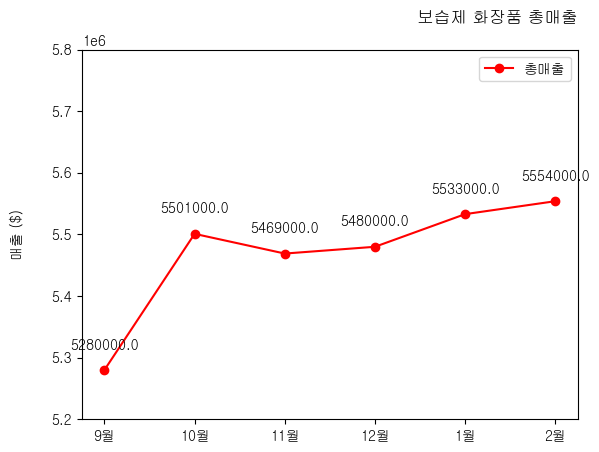

In [133]:
plt.title('보습제 화장품 총매출', loc='right', pad = 20)

plt.plot(df.총매출, 'ro-', label='총매출')

plt.ylabel('매출 ($)', labelpad=20)

plt.ylim([5200000, 5800000])

plt.legend()

for i in range(len(df.index)):
    height = df.총매출[i]
    plt.text(df.index[i], height + 30000, '%.1f' %height, ha='center', va='bottom', size = 10)
    
plt. show()

## 총매출 vs 목표 매출

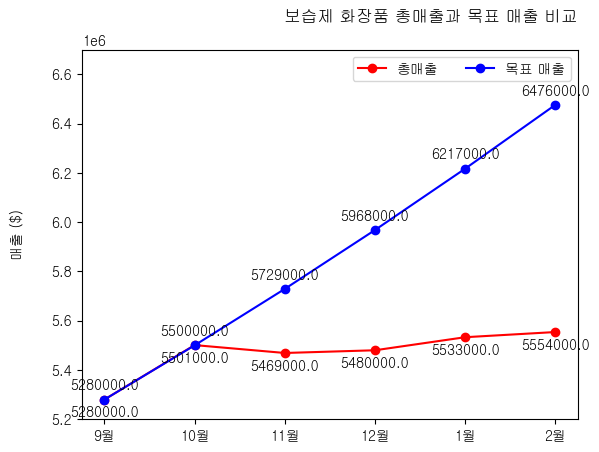

In [93]:
plt.title('보습제 화장품 총매출과 목표 매출 비교', loc='right', pad = 20)

plt.plot(df.총매출, 'ro-', label='총매출')
plt.plot(df.목표매출, 'bo-', label='목표 매출')

plt.ylabel('매출 ($)', labelpad=20)

plt.ylim([5200000, 6700000])

plt.legend(loc='best', ncol=2)

for i in range(len(df.index)):
    height = df.총매출[i]
    plt.text(df.index[i], height - 80000, '%.1f' %height, ha='center', va='bottom', size = 10)
    
for i in range(len(df.index)):
    height2 = df.목표매출[i]
    plt.text(df.index[i], height2 + 30000, '%.1f' %height2, ha='center', va='bottom', size = 10)

plt. show()

## 목표 달성율

In [13]:
df['목표달성율'] = df['총매출'] / df['목표매출']  * 100
df

,총매출,목표매출,광고비용,소셜네트워크비용,1온스별단가,목표달성율
9월,5280000,5280000,1056000,0,200,100.000000
10월,5501000,5500000,950400,105600,200,100.018182
11월,5469000,5729000,739200,316800,200,95.461686
12월,5480000,5968000,528000,528000,190,91.823056
1월,5533000,6217000,316800,739200,190,88.997909
2월,5554000,6476000,316800,739200,190,85.762817


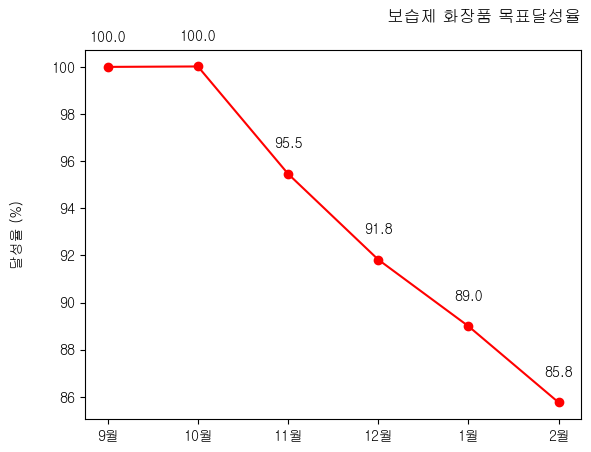

In [94]:
plt.title('보습제 화장품 목표달성율', loc='right', pad = 20)


plt.ylabel('달성율 (%)', labelpad=20)

plt.plot(df.목표달성율, 'ro-', label='목표달성율')

for i in range(len(df.index)):
    height = df.목표달성율[i]
    plt.text(df.index[i], height + 1, '%.1f' %height, ha='center', va='bottom', size = 10)

plt. show()

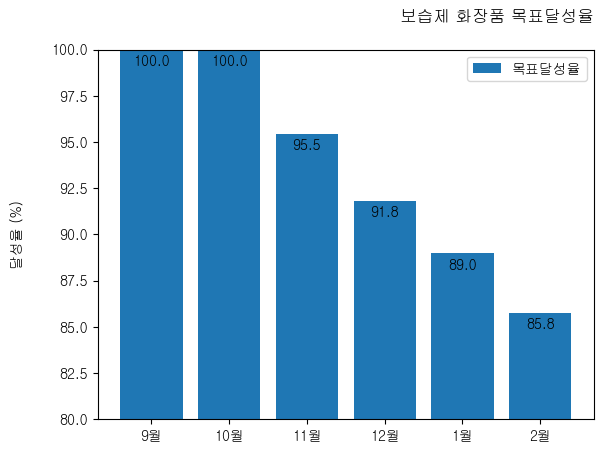

In [103]:
plt.title('보습제 화장품 목표달성율', loc='right', pad = 20)


plt.ylabel('달성율 (%)', labelpad=20)

bar = plt.bar(df.index[:], df.목표달성율, label='목표달성율')

plt.legend()

plt.ylim([80, 100])

for i in range(len(df.index)):
    height = df.목표달성율[i]
    plt.text(df.index[i], height - 1, '%.1f' %height, ha='center', va='bottom', size = 10)

plt. show()

## 광고 비용 vs 소셜 네트워크 비용

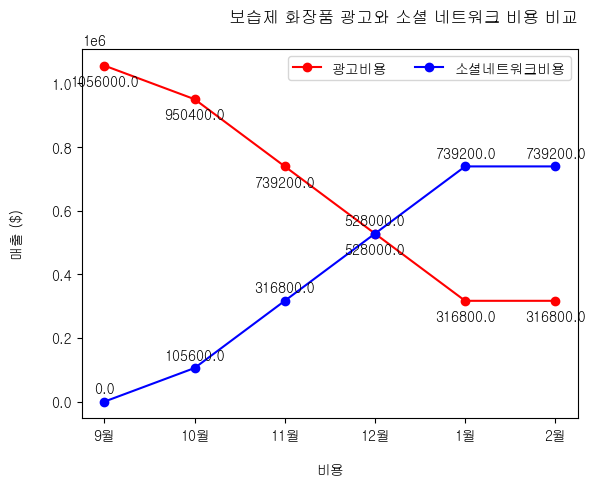

In [145]:
plt.title('보습제 화장품 광고와 소셜 네트워크 비용 비교', loc='right', pad = 20)

plt.plot(df.광고비용, 'ro-', label='광고비용')
plt.plot(df.소셜네트워크비용, 'bo-', label='소셜네트워크비용')

plt.xlabel('비용', labelpad=15)
plt.ylabel('매출 ($)', labelpad=20)

plt.legend(loc='best', ncol=2)

for i in range(len(df.index)):
    height = df.광고비용[i]
    plt.text(df.index[i], height - 70000, '%.1f' %height, ha='center', va='bottom', size = 10)
    
for i in range(len(df.index)):
    height = df.소셜네트워크비용[i]
    plt.text(df.index[i], height + 20000, '%.1f' %height, ha='center', va='bottom', size = 10)

plt. show()

In [40]:
df['광고비율'] = df['광고비용'] / 1056000  * 100
df['소셜네트워크비율'] = df['소셜네트워크비용'] / 1056000  * 100
df

,총매출,목표매출,광고비용,소셜네트워크비용,1온스별단가,목표달성율,광고비율,소셜네트워크비율
9월,5280000,5280000,1056000,0,200,100.000000,100.0,0.0
10월,5501000,5500000,950400,105600,200,100.018182,90.0,10.0
11월,5469000,5729000,739200,316800,200,95.461686,70.0,30.0
12월,5480000,5968000,528000,528000,190,91.823056,50.0,50.0
1월,5533000,6217000,316800,739200,190,88.997909,30.0,70.0
2월,5554000,6476000,316800,739200,190,85.762817,30.0,70.0


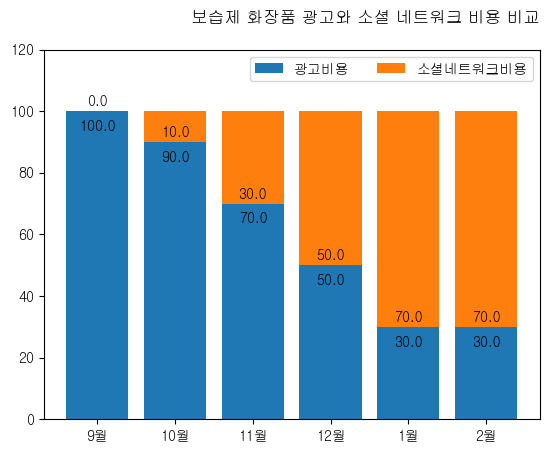

In [126]:
plt.title('보습제 화장품 광고와 소셜 네트워크 비용 비교', loc='right', pad = 20)

plt.bar(df.index[:], df.광고비율, label='광고비용')
plt.bar(df.index[:], df.소셜네트워크비율, bottom=df.광고비율, label='소셜네트워크비용')

plt.ylim([0, 120])

plt.legend(loc='best', ncol=2)

for i in range(len(df.index)):
    height1 = df.광고비율[i]
    plt.text(df.index[i], height1 - 7, '%.1f' %height1, ha='center', va='bottom', size = 10)
    
for i in range(len(df.index)):
    height1 = df.광고비율[i]
    height2 = df.소셜네트워크비율[i]
    plt.text(df.index[i], height1  + 1, '%.1f' %height2, 
             ha='center', va='bottom', size = 10)
           
plt.show()

# 경쟁사 매출 추정액

In [162]:
df['경쟁사매출추정최소']= df['총매출'] + (df['총매출'] / 2)
df['경쟁사매출추정최대']= df['총매출'] + (df['총매출'])
df

,총매출,목표매출,광고비용,소셜네트워크비용,1온스별단가,목표달성율,광고비율,소셜네트워크비율,경쟁사매출추정,경쟁사매출추정min,경쟁사매출추정최소,경쟁사매출추정최대
9월,5280000,5280000,1056000,0,200,100.000000,100.0,0.0,7920000.0,10560000,7920000.0,10560000
10월,5501000,5500000,950400,105600,200,100.018182,90.0,10.0,8251500.0,11002000,8251500.0,11002000
11월,5469000,5729000,739200,316800,200,95.461686,70.0,30.0,8203500.0,10938000,8203500.0,10938000
12월,5480000,5968000,528000,528000,190,91.823056,50.0,50.0,8220000.0,10960000,8220000.0,10960000
1월,5533000,6217000,316800,739200,190,88.997909,30.0,70.0,8299500.0,11066000,8299500.0,11066000
2월,5554000,6476000,316800,739200,190,85.762817,30.0,70.0,8331000.0,11108000,8331000.0,11108000


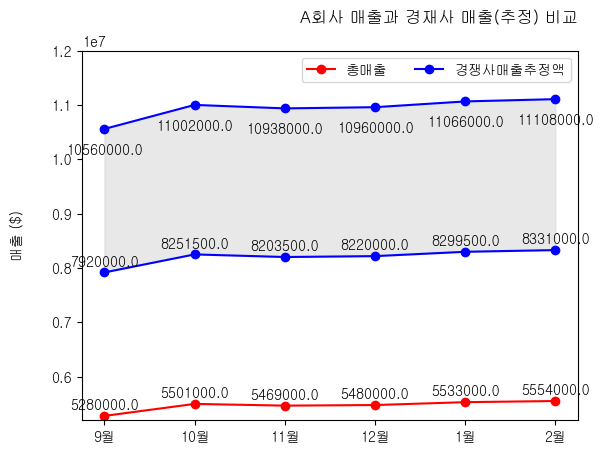

In [174]:
plt.title('A회사 매출과 경재사 매출(추정) 비교', loc='right', pad = 20)

plt.plot(df.총매출, 'ro-', label='총매출')
plt.plot(df.경쟁사매출추정최대, 'bo-', label='경쟁사매출추정액')
plt.plot(df.경쟁사매출추정최소, 'bo-',)

plt.fill_between(df.index[:], df.경쟁사매출추정최소[:], df.경쟁사매출추정최대,
                 color='lightgray', alpha=0.5)

plt.ylabel('매출 ($)', labelpad=20)

plt.ylim([5200000, 12000000])

plt.legend(loc='best', ncol=2)

for i in range(len(df.index)):
    height = df.총매출[i]
    plt.text(df.index[i], height + 80000, '%.1f' %height, ha='center', va='bottom', size = 10)
    
for i in range(len(df.index)):
    height = df.경쟁사매출추정최대[i]
    plt.text(df.index[i], height - 500000, '%.1f' %height, ha='center', va='bottom', size = 10)
    
for i in range(len(df.index)):
    height = df.경쟁사매출추정최소[i]
    plt.text(df.index[i], height + 80000, '%.1f' %height, ha='center', va='bottom', size = 10)

plt. show()